In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

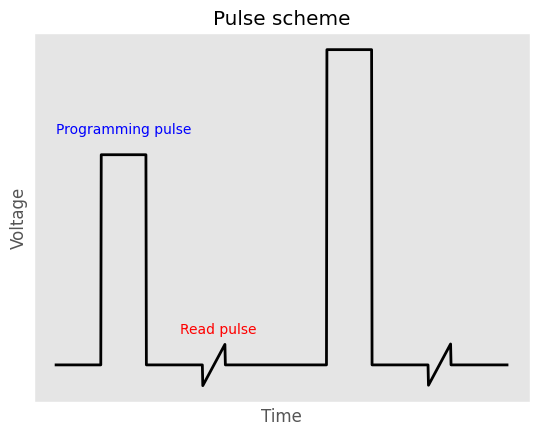

In [2]:
def _single_pulse(x, v_start=1, v_inc=0.1, v_read=0.1):
    pulseStart = 0.2
    pulseEnd = 0.4
    rpulseStart = 0.65
    rpulseEnd = 0.75

    v = v_start + int(x) * v_inc
    x = x % 1

    if (x < pulseStart or x >= rpulseEnd) or (x >= pulseEnd and x < rpulseStart):
        return 0
    if x >= pulseStart and x < pulseEnd:
        return v
    if x >= rpulseStart and x < rpulseEnd:
        m = 2 * v_read / (rpulseEnd - rpulseStart)
        return m * (x - 0.7)

single_pulse = np.vectorize(_single_pulse, otypes=[np.float64])
    
x = np.linspace(0, 2, 1000)
y = single_pulse(x, v_start=1, v_inc=0.5)

fig, ax = plt.subplots()
ax.plot(x, y, color='black', lw=2)
ax.set(xticks=[], yticks=[], title='Pulse scheme', xlabel="Time", ylabel="Voltage")
ax.annotate('Programming pulse', xy=(0, 1.1), color='blue')
ax.annotate('Read pulse', xy=(0.55, 0.15), color='red')
#plt.savefig('tmp.png')
plt.show()

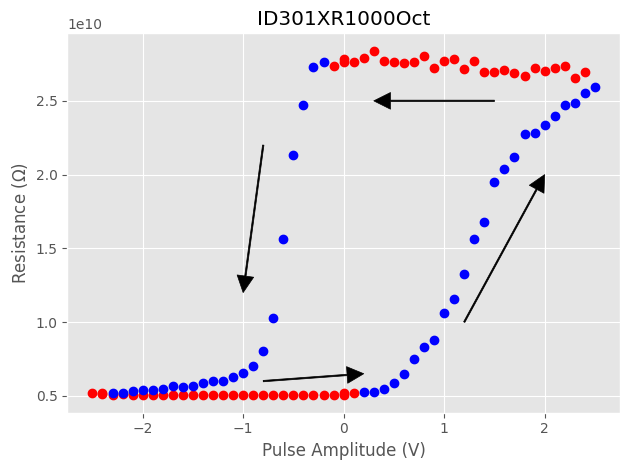

In [43]:
import msc_project.utils.nonlinear_fit as nlf
metadata, meas_params, meas_data = nlf.read_file('/scratch/msc24h18/msc_project/data/LBE247/LBE247_ID301XR1000Oct/pulsedAmplitudeSweep_DCIV_20240919143913/pulsedAmplitudeSweep_DCIV[LBE247_ID301XR1000Oct(1)]20240919144143.csv')
VStartPos, VEndPos, VStartNeg, VEndNeg = 0.1, 2.6, -0.1, -2.4 # from cutoffs file
# keep only positive sequence of increasing voltage and negative sequence of decreasing voltage
kpos = []
kneg = []
vprev = None
for i, v in enumerate(meas_data[:,1]):
    if vprev is not None:
        if v > 0 and v > vprev and v > VStartPos and v < VEndPos:
            kpos.append(i)
        elif v < 0 and v < vprev and v < VStartNeg and v > VEndNeg:
            kneg.append(i)
    vprev = v
kpos = np.array([kpos])
kneg = np.array([kneg])

# not strictly necessary to use mask, as plotting the red points first will make them appear below the blue points,
# but you can still see a slight red edge
mask = np.ones(meas_data.shape[0], dtype=bool)
mask[kpos] = False
mask[kneg] = False

fig, ax = plt.subplots()
ax.plot(meas_data[mask,1], meas_data[mask,3], label='R_high', ls='none', marker='o', color='r')
ax.plot(meas_data[kneg,1][0], meas_data[kneg,3][0], label='R_high', ls='none', marker='o', color='b')
ax.plot(meas_data[kpos,1][0], meas_data[kpos,3][0], label='R_high', ls='none', marker='o', color='b')

ax.annotate("", xytext=(1.2, 1e10), xy=(2, 2e10), arrowprops=dict(width=1, color='k'))
ax.annotate("", xytext=(1.5, 2.5e10), xy=(0.3, 2.5e10), arrowprops=dict(width=1, color='k'))
ax.annotate("", xytext=(-0.8, 2.2e10), xy=(-1, 1.2e10), arrowprops=dict(width=1, color='k'))
ax.annotate("", xytext=(-0.8, 0.6e10), xy=(0.2, 0.65e10), arrowprops=dict(width=1, color='k'))

ax.set(xlabel='Pulse Amplitude (V)', ylabel='Resistance ($\\Omega$)', title="ID301XR1000Oct")

plt.tight_layout()
plt.savefig('tmp.png')
plt.show()


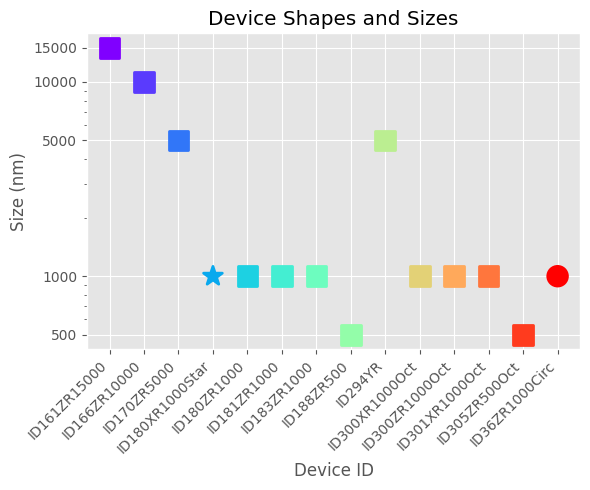

In [63]:
shapes = pd.read_csv('/scratch/msc24h18/msc_project/data/LBE247_shapes_and_sizes.csv').sort_values(by='device_id')

fig, ax = plt.subplots(figsize=(6, 5))
colors = plt.cm.rainbow(np.linspace(0, 1, len(shapes)))
markers = {'Circ': 'o', 'Star': '*', 'Oct': 's'}

for shape in shapes['shape'].unique():
    sizes = [200 if s == shape else 0 for s in shapes['shape']]
    ax.scatter(shapes['device_id'], shapes['size'], c=colors, marker=markers[shape], lw=2, sizes=sizes)

# ax.scatter(shapes['device_id'], shapes['size'], c=colors)
ax.set(xlabel='Device ID', ylabel='Size (nm)', title='Device Shapes and Sizes', yscale='log')

ax.set_xticks(shapes['device_id'])
ax.set_xticklabels(shapes['device_id'], rotation=45, ha='right')

ax.set_yticks([500, 1000, 5000, 10000, 15000])
ax.set_yticklabels([500, 1000, 5000, 10000, 15000])

plt.tight_layout()
plt.savefig('tmp.png')
plt.show()

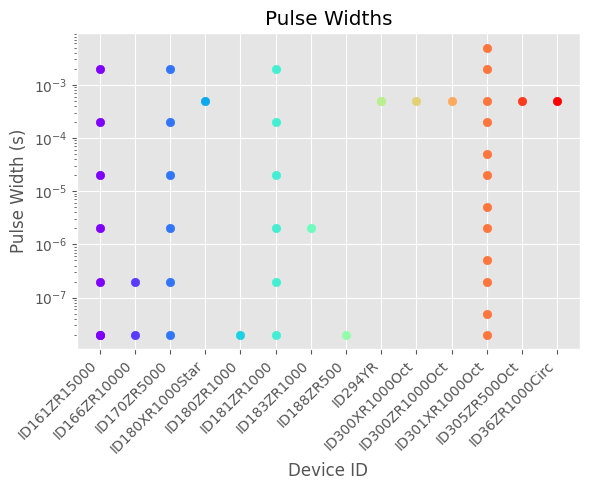

In [73]:
df = pd.read_csv('/scratch/msc24h18/msc_project/results/test50/test50.csv').sort_values(by='device_id')

fig, ax = plt.subplots(figsize=(6, 5))
colors = plt.cm.rainbow(np.linspace(0, 1, len(df['device_id'].unique())))

for device_id, color in zip(df['device_id'].unique(), colors):
    data = df[df['device_id'] == device_id]
    ax.scatter(data['device_id'], data['pulseWidth'], color=color)

ax.set(yscale='log', xlabel='Device ID', ylabel='Pulse Width (s)', title='Pulse Widths')

ax.set_xticks(df['device_id'].unique())
ax.set_xticklabels(df['device_id'].unique(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('tmp.png')
plt.show()